# Trying out Ruby for Data Science



### Requirements
- Ruby
  - $ gem install matplotlib
- Python3
  - pip install matplotlib

### Setup

In [2]:
require "csv"
require 'matplotlib/iruby'
require 'matplotlib/pyplot'
Matplotlib::IRuby.activate

[:inline, "module://ruby.matplotlib.backend_inline"]

### Trying to read a file

In [1]:
puts File.read("airplane-crashes.csv")[0..100]

Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0


### Trying out matplotlib (via pycall)

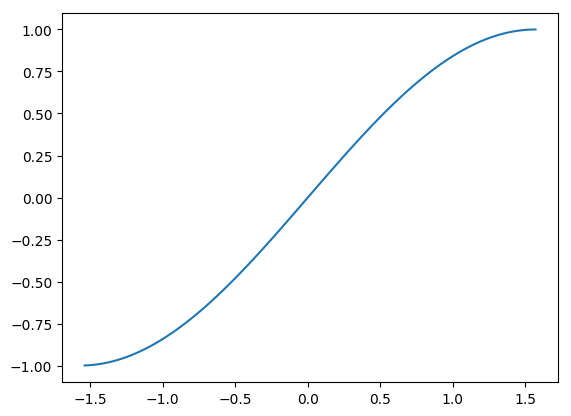

In [3]:
plt = Matplotlib::Pyplot

xs = [*1..100].map {|x| (x - 50) * Math::PI / 100.0 }
ys = xs.map {|x| Math.sin(x) }

plt.plot(xs, ys)
plt.show()

### Parsing the CSV

In [6]:
crashes = CSV.read("airplane-crashes.csv", headers: true)

#<CSV::Table mode:col_or_row row_count:5269>

Question 1: How many crashes per year?

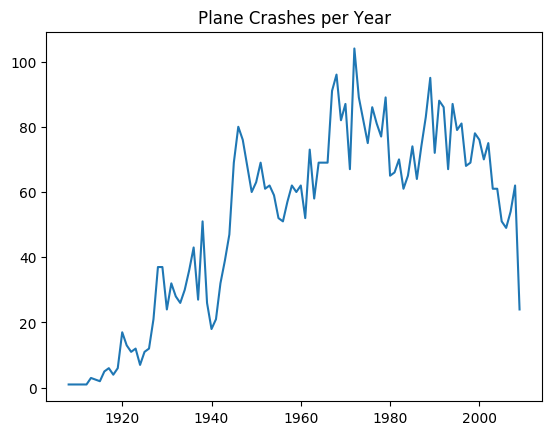

In [7]:
years = {}
years.default = 0

crashes.each{ |line|
  if %r[/(\d{4})\z] =~ line[0]
    year = $1.to_i
    years[year] += 1
  end
}

xs, ys = years.to_a.sort.transpose

# - - -

plt = Matplotlib::Pyplot
plt.plot(xs, ys)
plt.title "Plane Crashes per Year"
plt.show()